In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

## Intro

1. Submit this task as a link to your team's Google Colab (https://colab.research.google.com/notebooks/intro.ipynb#). Make sure you made a copy of this notebook and opened it via UCU email address.

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.   

4. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

5. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **recizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!




## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

Mounted at /content/drive
The shape of the image is (500, 500, 3)


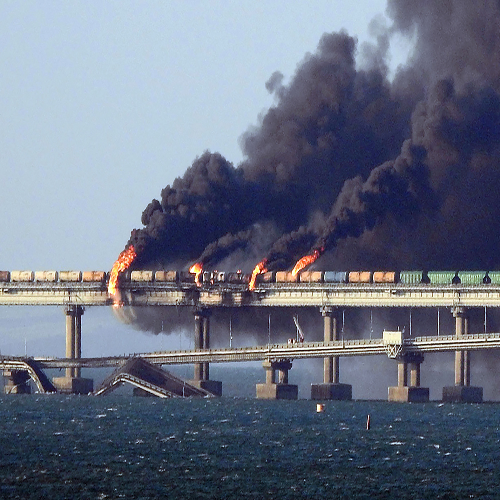

In [ ]:
##### YOUR CODE STARTS #####
drive.mount('/content/drive')

img1_path = '/content/drive/MyDrive/Media/Photos/img1.jpg'
img1 = cv.imread(img1_path)
img1 = cv.resize(img1, (500,500))

print(f"The shape of the image is {img1.shape}")
cv2_imshow(img1)
##### YOUR CODE ENDS #####

 What is this image's shape? What do the values mean?

*(Your answer goes here)*

### 1.2 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
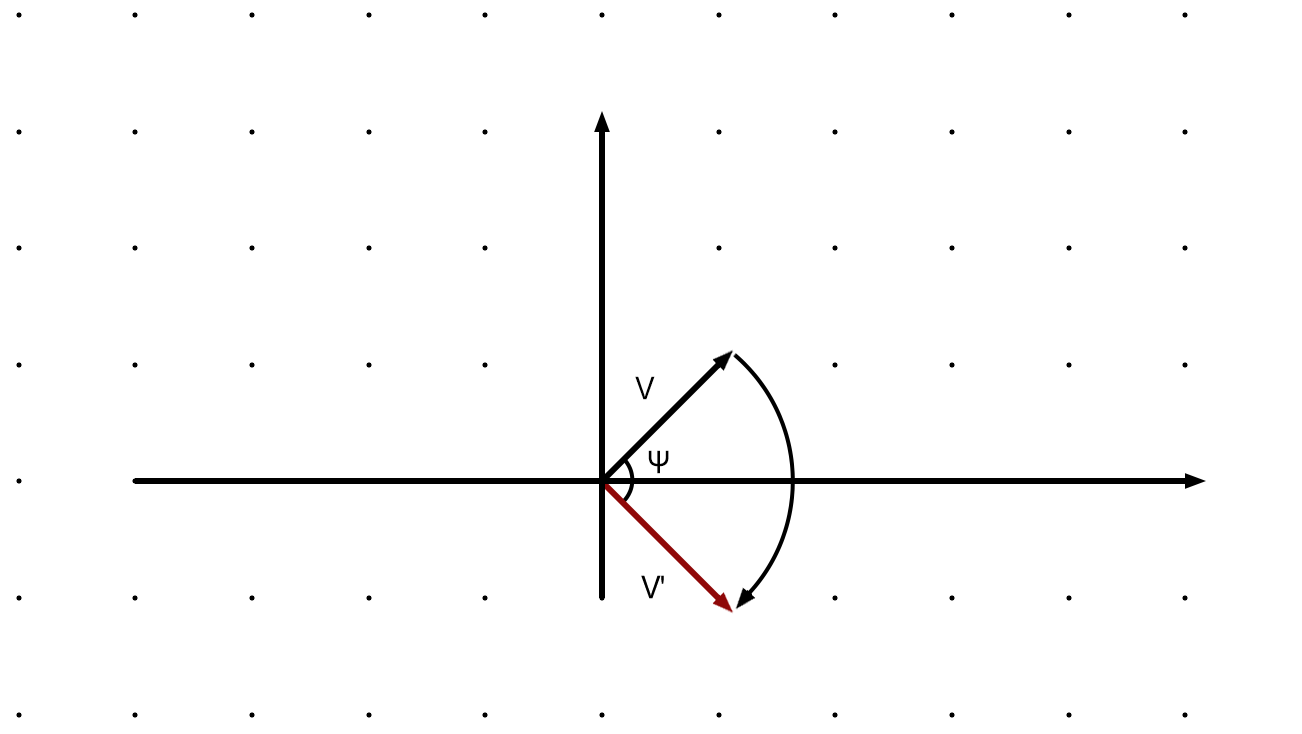

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?

*(Your answer is here)*

Your next task is to implement a function that calculates the rotation matrix and apply it to a vector and to an image to rotate them by $45^\circ$.
First, construct the rotation matrix:

In [ ]:
# Create rotation matrix

def get_rotation_matrix(phi):
  ##### YOUR CODE STARTS #####
  ...
  ##### YOUR CODE ENDS ##### 
  return transformation_matrix

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
# Apply rotation to the vector AB1 to get vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([1.5, 1.5])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! Check how below:

In [ ]:
##### YOUR CODE STARTS #####
rotated = cv.warpAffine(..., ..., (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####

cv2_imshow(rotated)

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
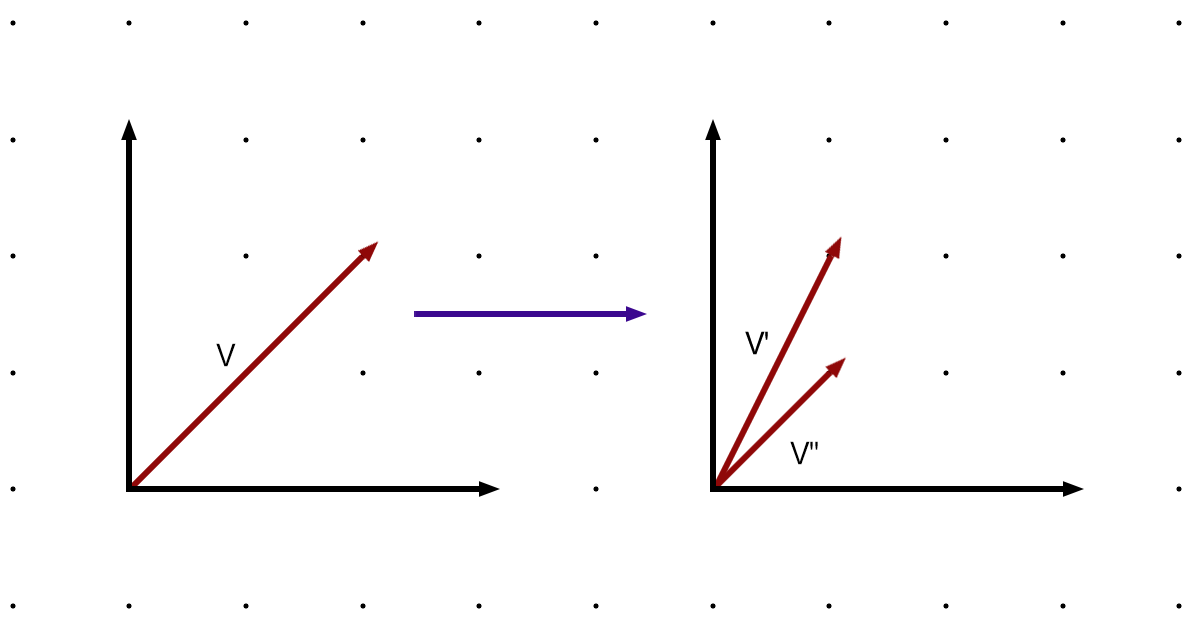

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector and the image. First, explain how you derive the scaling matrix:

*(Your answer goes here)*

In [ ]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return ...

M2 = ...

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Second, apply scaling by (1, 0.5) to the vector.

In [ ]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([2, 2])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by the same factor to the image:

In [ ]:
##### YOUR CODE STARTS #####
scaled = ...
##### YOUR CODE ENDS #####
cv2_imshow(scaled)

### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you needs to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector and the image. First, explain how do you build a matrix that corresponds to a shearing transformation:

*(Your answer goes here)*

Second, implement a function for constructing such a matrix:

In [ ]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):
  return ...

M3 = ...
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

In [ ]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([1, 1])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image. 

In [ ]:
##### YOUR CODE STARTS #####
sheared = ...
##### YOUR CODE ENDS #####
cv2_imshow(sheared)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


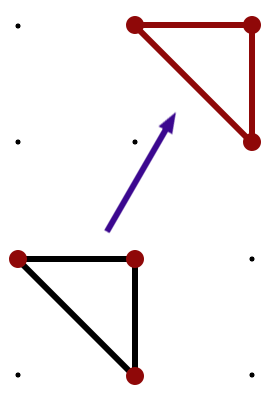

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector and to the image. Start from explaining how to construct a translation matrix:

*(Your answer goes here)*

Then, implement a function that produces such a matrix:

In [ ]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return ...

M4 = ...
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

In [ ]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])
A2 = ...
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation by $(20, 25)$ to the image.

In [ ]:
##### YOUR CODE STARTS #####
translated = ...
##### YOUR CODE ENDS #####
cv2_imshow(translated)

### 1.6 Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

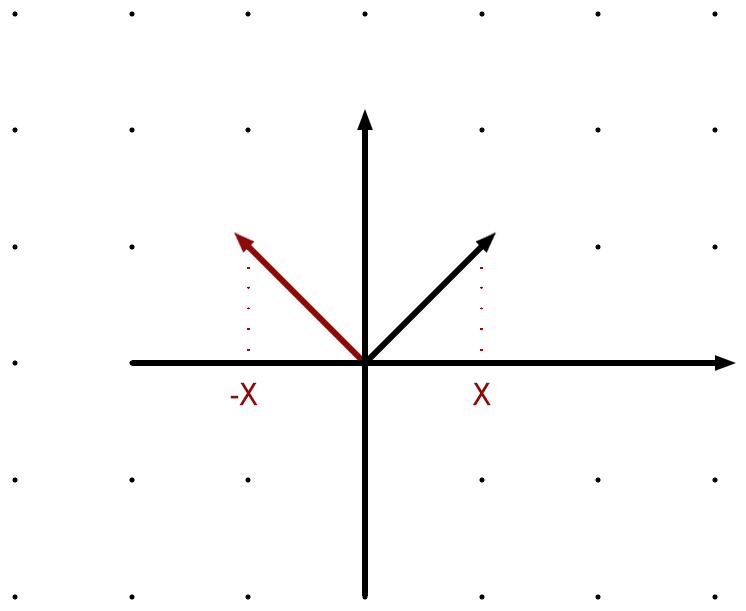

As in the previous parts, you need to provide the expanation, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

*(Your answer goes here)*

In [ ]:
##### YOUR CODE STARTS #####
def get_horizontal_mirror_marix():
  return ...

M5 = ...
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

In [ ]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([1, 1])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
##### YOUR CODE STARTS #####
mirrored = ...
##### YOUR CODE ENDS #####
cv2_imshow(mirrored)

## 2.

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

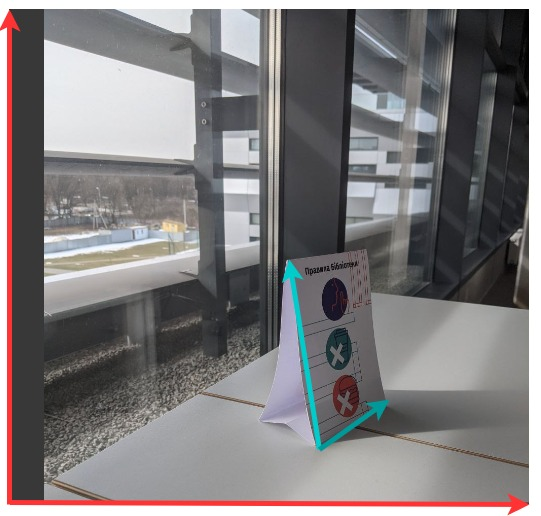

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear). In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible. 
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

*(Your answer goes here)*

Next, prepare the second image:

The shape of the image is (1280, 960, 3)


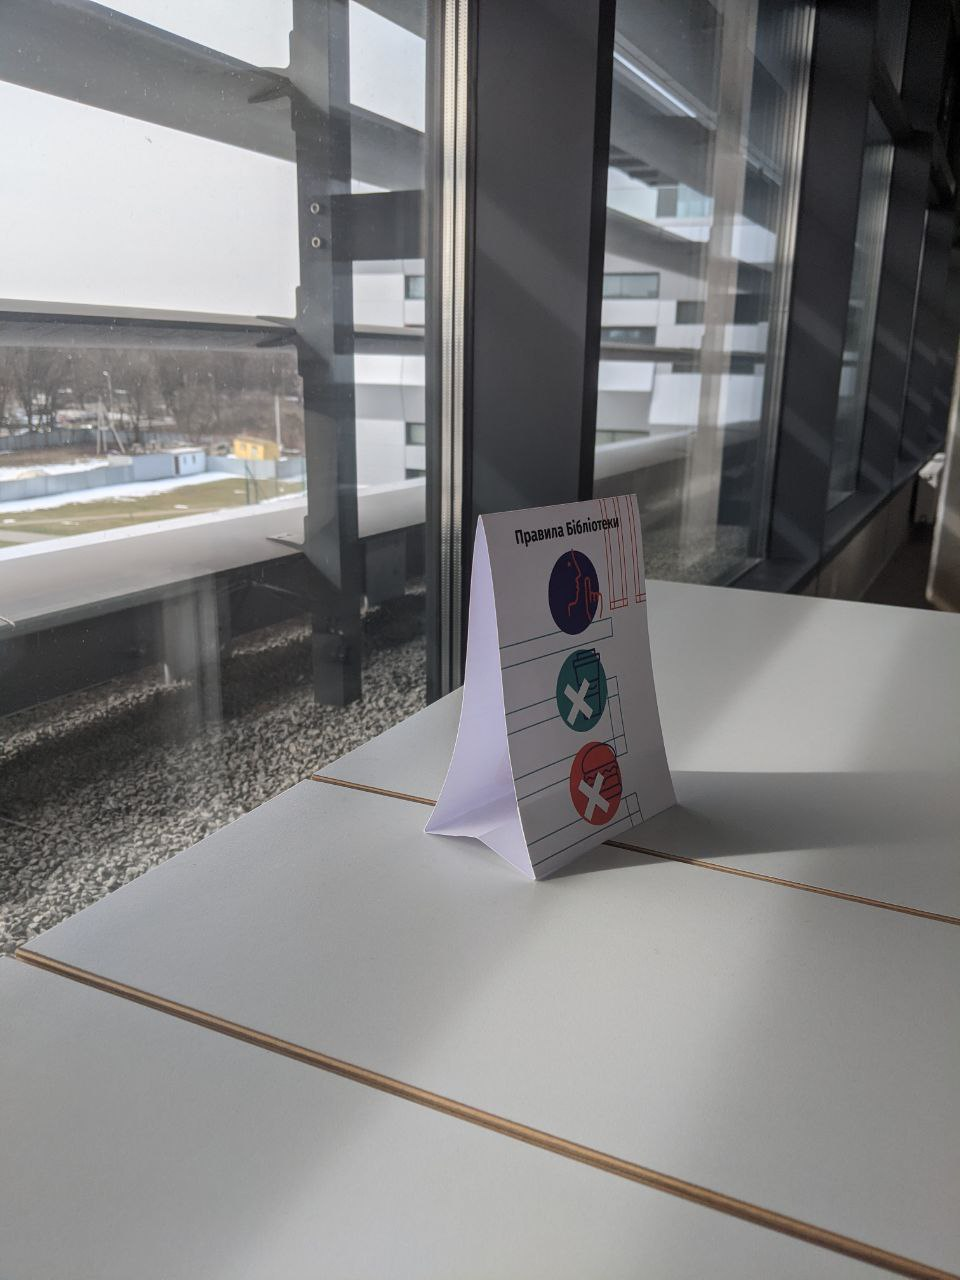

In [ ]:
img2_path = '/content/drive/MyDrive/Media/Photos/img2.jpg'
img2 = cv.imread(img2_path)

print(f"The shape of the image is {img2.shape}")
cv2_imshow(img2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

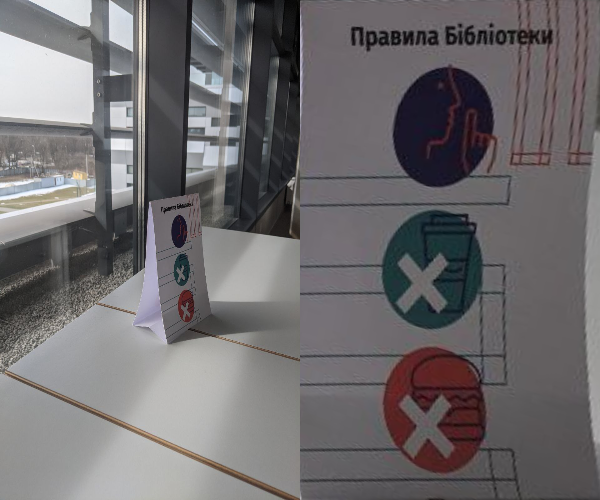

In [ ]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source, destination):
    assert len(source) >= 4
    assert len(destination) >= 4
    assert len(source) == len(destination)
    A = []
    b = []
    for i in range(len(source)):
        s_x, s_y = source[i]
        d_x, d_y = destination[i]
        A.append([s_x, s_y, 1, 0, 0, 0, (-d_x)*(s_x), (-d_x)*(s_y)])
        A.append([0, 0, 0, s_x, s_y, 1, (-d_y)*(s_x), (-d_y)*(s_y)])
        b += [d_x, d_y]
    A = np.array(A)
    res = np.linalg.lstsq(A, b, rcond=None)[0]
    res = np.concatenate((res, [1]), axis=-1)
    return np.reshape(res, (3, 3))

source_points = np.float32([(535, 879), (676, 804), (636, 495), (481, 514)])
destination_points = np.float32([(0, 1280), (960, 1280), (960, 0), (0, 0)])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(img2, perspective_shift_m, (960, 1280), flags=cv.INTER_LINEAR)

vis = np.concatenate((img2, transformed), axis=1)
vis = cv.resize(vis, (600, 500))
cv2_imshow(vis)

##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####

##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

##### YOUR CODE ENDS #####

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

*(Your answer goes here)*

## Summary

### Task1
...
### Task2
We've learned to apply perspective-changing transformations and how they work. We've used this kind of transformation to achive the image with a more distinct text on it than on the original image.

### What is a transformation matrix?
A transformation matrix is a mathematical tool used to represent transformations in space, such as rotations, translations, scaling, and shearing. It is a square matrix that can be used to transform a vector or point from one coordinate system to another.

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

The shape of a transformation matrix determines the type of transformation that is applied to the image, while the values of the matrix determine the degree and direction of the transformation.

In image processing, a typical transformation matrix used for affine transformations (i.e., transformations that preserve parallel lines) is a 3x3 matrix. This matrix includes elements that represent translations, rotations, and scaling factors.

Factors that affect the shape of a transformation matrix used in image processing include the type of transformation required, the degree and direction of the transformation, and the dimensions of the image being transformed.

### What can be a result of composition of transformations?

The result of the composition of transformations is a single transformation that is equivalent to applying all of the individual transformations in the sequence. In general, it depends on the order in which the individual transformations are applied, as well as the parameters of each individual transformation.

### What is a perspective shift transformation in terms of geometry?

A perspective shift transformation involves the projection of points and lines from a three-dimensional space onto a two-dimensional plane.

In a perspective shift transformation, parallel lines in 3D space do not necessarily remain parallel after the projection onto the 2D plane. This can result in distortion of the image, particularly near the edges of the image.